In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Import and visualize raster from $\texttt{R}$

In [ ]:
path = '../../../readMesh/data/emanuele/lasca/'
# import a csv matrix from path
matrix = np.genfromtxt(path+'SST_flo.csv', delimiter=',')

In [ ]:
matrix[:,2] = matrix[:,2] - 273.15
matrix

In [ ]:
x = matrix[:,0]
y = matrix[:,1]
values = matrix[:,2]
# plot the contour of the data
k = 0.8
plt.figure(figsize=(15*k, 12*k))
# plt.tricontourf(x, y, values)
plt.scatter(x, y, c=values, s=0.1)
plt.colorbar()
plt.show()

In [ ]:
# min_x, max_x = int(np.min(x)), int(np.max(x))
min_x, max_x = np.min(x), np.max(x)
# min_y, max_y = int(np.min(y)), int(np.max(y))
min_y, max_y = np.min(y), np.max(y)
print("min_x: ", min_x, "max_x: ", max_x)
print("min_y: ", min_y, "max_y: ", max_y)
mult_factor = 100

# create a square matrix with zeros
side_length = int(max(max_x - min_x + 1, max_y - min_y + 1))
square_matrix = np.zeros((side_length*mult_factor, side_length*mult_factor))
print(square_matrix.shape)

# fill in the values from the input matrix
for v, w, value in matrix:
    square_matrix[int((w - min_y)*mult_factor), int((v - min_x)*mult_factor)] = value
# flip squared_matrix 
square_matrix = np.flip(square_matrix, 0)

# plot squared_matrix
plt.figure()
# plt.imshow(square_matrix, vmin=17, vmax=29)
plt.imshow(square_matrix)
plt.colorbar()
plt.show()

In [ ]:
path = '../../../readMesh/data/emanuele/lasca/'
meshnodes = np.genfromtxt(path+'nodes.txt', delimiter=' ')
dirichletnodes = np.genfromtxt(path+'dirichlet_nodes.txt', delimiter=' ')

In [ ]:
meshnodes, dirichletnodes

In [ ]:
plt.figure()
# plt.imshow(square_matrix, vmin=17, vmax=29)
plt.imshow(square_matrix)
plt.colorbar()
for node in dirichletnodes:
    cordx, cordy = meshnodes[int(node)-1]
    # if cordx < -85.275 or cordx > -78.995 or cordy < 23.305 or cordy > 30.805:
    if cordx < min_x or cordx > max_x or cordy < min_y or cordy > max_y:
        print(cordx, cordy)
    # reshape coordinates to fit the squared matrix
    cordx = int((cordx - min_x)*mult_factor)
    cordy = -int((cordy - min_y)*mult_factor) + side_length*mult_factor
    print(cordx, cordy)
    plt.scatter(cordx, cordy, c='red', s=5)

# min_x:  -85.2700040478115 max_x:  -79.0000039521362
# min_y:  23.3099994466548 max_y:  30.7999992688532


### Flatten locations

In [24]:
import numpy as np
# import a matrix from path
path = '../../../readMesh/data/emanuele/golfo/'
matrix = np.genfromtxt(path+'locations.txt', delimiter=' ')
matrix

array([[-90.12,  28.26],
       [-85.6 ,  26.  ],
       [-81.11,  24.71],
       [-89.2 ,  28.2 ],
       [-89.7 ,  25.9 ],
       [-88.1 ,  29.1 ],
       [-93.5 ,  28.6 ],
       [-80.4 ,  25.  ],
       [-96.  ,  25.2 ],
       [-87.3 ,  26.9 ],
       [-90.2 ,  27.  ],
       [-81.9 ,  23.9 ],
       [-87.3 ,  28.9 ],
       [-83.6 ,  24.6 ],
       [-90.1 ,  26.9 ],
       [-88.5 ,  27.9 ],
       [-88.29,  29.92],
       [-92.6 ,  27.9 ],
       [-80.9 ,  24.8 ],
       [-90.9 ,  26.2 ],
       [-90.3 ,  26.9 ],
       [-81.1 ,  24.3 ],
       [-89.41,  28.93],
       [-81.81,  24.55],
       [-90.3 ,  27.  ],
       [-80.2 ,  28.5 ],
       [-87.35,  29.14],
       [-80.16,  25.73],
       [-80.6 ,  29.9 ],
       [-80.5 ,  24.7 ],
       [-80.3 ,  28.2 ],
       [-80.2 ,  27.6 ],
       [-80.5 ,  28.4 ],
       [-91.8 ,  27.5 ],
       [-88.2 ,  29.2 ],
       [-81.8 ,  24.2 ],
       [-89.12,  24.01],
       [-80.1 ,  27.8 ],
       [-84.5 ,  28.5 ],
       [-82.83,  27.98],


In [25]:
# now I want to have this matrix on a single row where every value of the second column is inserted right below each corresponding value of the first column
new_matrix = np.zeros((matrix.shape[0]*2, 1))
new_matrix[::2, 0] = matrix[:,0]
new_matrix[1::2, 0] = matrix[:,1]
new_matrix

array([[-90.12],
       [ 28.26],
       [-85.6 ],
       [ 26.  ],
       [-81.11],
       [ 24.71],
       [-89.2 ],
       [ 28.2 ],
       [-89.7 ],
       [ 25.9 ],
       [-88.1 ],
       [ 29.1 ],
       [-93.5 ],
       [ 28.6 ],
       [-80.4 ],
       [ 25.  ],
       [-96.  ],
       [ 25.2 ],
       [-87.3 ],
       [ 26.9 ],
       [-90.2 ],
       [ 27.  ],
       [-81.9 ],
       [ 23.9 ],
       [-87.3 ],
       [ 28.9 ],
       [-83.6 ],
       [ 24.6 ],
       [-90.1 ],
       [ 26.9 ],
       [-88.5 ],
       [ 27.9 ],
       [-88.29],
       [ 29.92],
       [-92.6 ],
       [ 27.9 ],
       [-80.9 ],
       [ 24.8 ],
       [-90.9 ],
       [ 26.2 ],
       [-90.3 ],
       [ 26.9 ],
       [-81.1 ],
       [ 24.3 ],
       [-89.41],
       [ 28.93],
       [-81.81],
       [ 24.55],
       [-90.3 ],
       [ 27.  ],
       [-80.2 ],
       [ 28.5 ],
       [-87.35],
       [ 29.14],
       [-80.16],
       [ 25.73],
       [-80.6 ],
       [ 29.9 ],
       [-80.5 

In [26]:
# save the new matrix
np.savetxt(path+'locations_flattened.txt', new_matrix, delimiter=' ', fmt='%1.6f')

### Visualize results of LOOCV (on coarse mesh)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### model with $\rho$

In [20]:
# transform the previous two cells ina function that takes a path in input and returns the average and median error and RMSE
def plot_LOOCV(path, ylim_err=(0, 1), ylim_rmse=(0, 1), plot=True):
    LOOCV_rho = np.genfromtxt(path, delimiter='\t')
    rhoValue = LOOCV_rho[:, 0]
    locErr = LOOCV_rho[:, 4]
    unique_values = np.unique(rhoValue)
    grouped_data = []

    for value in unique_values:
        filtered_data = locErr[rhoValue == value]
        grouped_data.append(filtered_data)
    
    # if plot:
    #     plt.figure(figsize=(10, 6))
    #     plt.boxplot(grouped_data, tick_labels=unique_values)
    #     plt.xlabel('Rho ')
    #     plt.ylabel('LOOCV Error')
    #     plt.title('LOOCV error for increasing rho')
    #     plt.ylim(ylim_err)
    #     plt.show()

    # compute and print the average error for each rho
    average_err = []
    for value in unique_values:
        filtered_data = locErr[rhoValue == value]
        average_err.append(np.mean(filtered_data))
    
    print('unique_values', unique_values)
    print('average_err', average_err)
    
    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(unique_values, average_err, marker='o', markersize=3)
        plt.xlabel('Rho ')
        plt.ylabel('Average LOOCV Error')
        plt.title('Average LOOCV error for increasing rho')
        plt.savefig('LOOCV_error_varying_rho_coarse.png')
        plt.show()
        
    # print the average error and highlight the minimum value together with the corresponding rho
    min_err = np.min(average_err)
    min_rho = unique_values[np.argmin(average_err)]
    print(f"Minimum (average) LOOCV error: {min_err} for rho: {min_rho}")

    # compute and print the median error for each rho
    median_err = []
    for value in unique_values:
        filtered_data = locErr[rhoValue == value]
        median_err.append(np.median(filtered_data))

    # print the median error and highlight the minimum value together with the corresponding rho
    min_err = np.min(median_err)
    min_rho = unique_values[np.argmin(median_err)]
    print(f"Minimum (median) LOOCV error: {min_err} for rho: {min_rho}")
    
    rhoValue = LOOCV_rho[:, 0]
    rmse = LOOCV_rho[:, 3]
    unique_values = np.unique(rhoValue)
    grouped_data = []

    for value in unique_values:
        filtered_data = rmse[rhoValue == value]
        grouped_data.append(filtered_data)

    # if plot:
    #     plt.figure(figsize=(10, 6))
    #     plt.boxplot(grouped_data, tick_labels=unique_values)
    #     plt.xlabel('Rho ')
    #     plt.ylabel('RMSE')
    #     plt.title('RMSE for increasing rho')
    #     plt.ylim(ylim_rmse)
    #     plt.show()

    # compute and print the average RMSE for each rho
    average_rmse = []
    for value in unique_values:
        filtered_data = rmse[rhoValue == value]
        average_rmse.append(np.mean(filtered_data))

    # print the average RMSE and highlight the minimum value together with the corresponding rho
    min_rmse = np.min(average_rmse)
    min_rho = unique_values[np.argmin(average_rmse)]
    print(f"Minimum (average) RMSE: {min_rmse} for rho: {min_rho}")
    
    # compute and print the median RMSE for each rho
    median_rmse = []
    for value in unique_values:
        filtered_data = rmse[rhoValue == value]
        median_rmse.append(np.median(filtered_data))

    # print the median RMSE and highlight the minimum value together with the corresponding rho
    min_rmse = np.min(median_rmse)
    min_rho = unique_values[np.argmin(median_rmse)]
    print(f"Minimum (median) RMSE: {min_rmse} for rho: {min_rho}")
        
    return average_err, median_err, average_rmse, median_rmse

LOOCV results for Florida with convex combination $(1-\rho),\rho$, stab param $\delta = 0.0$, $|\Omega| = 1$

In [ ]:
path = './SeaSurfTemp/Florida/model_with_convex_combination_rho/LOOCV_best_rho_1.txt'
average_err, median_err, average_rmse, median_rmse = plot_LOOCV(path, plot=True)

unique_values [0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23
 0.24 0.25 0.26 0.27 0.28 0.29]
average_err [0.5736210225791457, 0.5712344825199139, 0.5691441271696298, 0.5685010827696426, 0.5681990079811224, 0.5679486794351066, 0.5677433719308762, 0.5675771682836768, 0.5674448727320873, 0.5673419261571195, 0.5672643274684652, 0.567208562844136, 0.5671715431677953, 0.5671505492894101, 0.56714318444972, 0.5671846019650212, 0.5672445724244727, 0.5673103262560334, 0.5677327812218586, 0.5681783827884398]


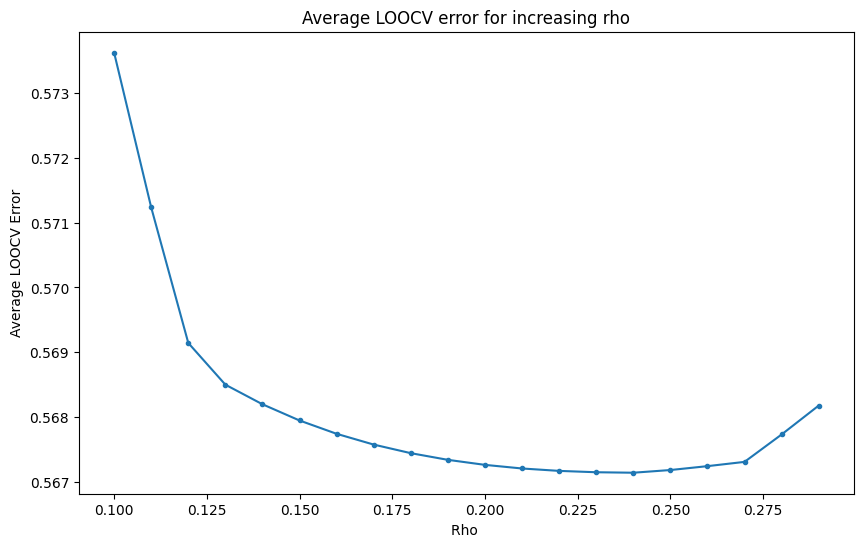

Minimum (average) LOOCV error: 0.56714318444972 for rho: 0.2400000000000001
Minimum (median) LOOCV error: 0.4631168070436136 for rho: 0.1
Minimum (average) RMSE: 0.8728933955084968 for rho: 0.29000000000000015
Minimum (median) RMSE: 0.8306055428857605 for rho: 0.29000000000000015


In [21]:
path = './SeaSurfTemp/Florida/model_with_convex_combination_rho/LOOCV_best_rho_2.txt'
average_err, median_err, average_rmse, median_rmse = plot_LOOCV(path, plot=True)

In [12]:
path = './SeaSurfTemp/Florida/model_with_convex_combination_rho/LOOCV_best_rho_3.txt'
average_err, median_err, average_rmse, median_rmse = plot_LOOCV(path, plot=False)

Minimum (average) LOOCV error: 0.5671431138776339 for rho: 0.24100000000000002
Minimum (median) LOOCV error: 0.48058818747998444 for rho: 0.23
Minimum (average) RMSE: 0.8775463518395907 for rho: 0.25
Minimum (median) RMSE: 0.8329147737062014 for rho: 0.25


LOOCV results for Florida with convex combination $(1-\rho)\rho$ (stab param $\delta = 0.0$)

In [ ]:
path = './SeaSurfTemp/Florida/convex_combination_rho/results_LOOCV_rho_1_no_stab.txt'
average_err, median_err, average_rmse, median_rmse = plot_LOOCV(path, plot=False)

#### model with $\lambda$

results from tomasetto $\lambda=0.15, \delta = 0.0$ (on mesh coarse)

In [ ]:
path = './SeaSurfTemp/Florida/model_with_lambda/results_LOOCV_lambda_0.15_coarse.txt'
LOOCV_lambda_lasca_good = np.genfromtxt(path, delimiter='\t')
locErr = LOOCV_lambda_lasca_good[:, 3]

mean_err = np.mean(locErr)
median_err = np.median(locErr)
print(f"Mean LOOCV error: {mean_err}")
print(f"Median LOOCV error: {median_err}")

rmse = LOOCV_lambda_lasca_good[:, 2]
mean_rmse = np.mean(rmse)
median_rmse = np.median(rmse)
print(f"Mean RMSE: {mean_rmse}")
print(f"Median RMSE: {median_rmse}")

# boxplot of locErr
plt.figure(figsize=(3, 6))
plt.boxplot(locErr)
plt.title('LOOCV error')
plt.savefig('boxplot_locErr_mesh_coarse_LOOCV.png')
plt.show()

# boxplot of rmse (without outliers)
plt.figure(figsize=(3, 6))
plt.boxplot(rmse)
plt.title('RMSE')
plt.savefig('boxplot_rmse_mesh_coarse_LOOCV.png')
plt.show()

Forcing term $f=0\rightarrow f=0.01$

In [ ]:
path = './SeaSurfTemp/Florida/results_LOOCV_lambda_lasca_good_forcing_0.01.txt'
LOOCV_lambda_lasca_good = np.genfromtxt(path, delimiter='\t')
locErr = LOOCV_lambda_lasca_good[:, 3]

mean_err = np.mean(locErr[1:])
median_err = np.median(locErr[1:])
print(f"Mean LOOCV error: {mean_err}")
print(f"Median LOOCV error: {median_err}")

rmse = LOOCV_lambda_lasca_good[:, 2]
mean_rmse = np.mean(rmse[1:])
median_rmse = np.median(rmse[1:])
print(f"Mean RMSE: {mean_rmse}")
print(f"Median RMSE: {median_rmse}")

.$\lambda=0.15, \delta=0.0\rightarrow \delta = 0.1$

In [ ]:
path = './SeaSurfTemp/Florida/results_LOOCV_lambda_lasca_good_stab0.1.txt'
LOOCV_lambda_lasca_good = np.genfromtxt(path, delimiter='\t')
locErr = LOOCV_lambda_lasca_good[:, 3]

mean_err = np.mean(locErr)
median_err = np.median(locErr)
print(f"Mean LOOCV error: {mean_err}")
print(f"Median LOOCV error: {median_err}")

rmse = LOOCV_lambda_lasca_good[:, 2]
mean_rmse = np.mean(rmse)
median_rmse = np.median(rmse)
print(f"Mean RMSE: {mean_rmse}")
print(f"Median RMSE: {median_rmse}")

Vary $\lambda$ in the interval $[0.005, 0.5]$ with step $0.005$

In [8]:
# transform the previous two cells ina function that takes a path in input and returns the average and median error and RMSE
def plot_LOOCV_lambda(path, ylim_err=(0, 1), ylim_rmse=(0, 1), plot=True):
    LOOCV_lambda = np.genfromtxt(path, delimiter='\t')
    lambdaValue = LOOCV_lambda[:, 0]
    locErr = LOOCV_lambda[:, 4]
    unique_values = np.unique(lambdaValue)
    grouped_data = []

    for value in unique_values:
        filtered_data = locErr[lambdaValue == value]
        grouped_data.append(filtered_data)
    
    if plot:
        plt.figure(figsize=(10, 6))
        plt.boxplot(grouped_data, tick_labels=unique_values)
        plt.xlabel('Rho ')
        plt.ylabel('LOOCV Error')
        plt.title('LOOCV error for increasing rho')
        plt.ylim(ylim_err)
        plt.show()

    # compute and print the average error for each rho
    average_err = []
    for value in unique_values:
        filtered_data = locErr[lambdaValue == value]
        average_err.append(np.mean(filtered_data))
    
    if plot:
        # plot the average error with markers
        plt.figure(figsize=(10, 6))
        # customize the shape and size of the marker and the color, differentiating the colour of the curve from the one of the markers
        plt.plot(unique_values, average_err, marker='o', markersize=3)
        plt.xlabel('lambda ')
        plt.ylabel('Average LOOCV Error')
        plt.title('Average LOOCV error for increasing lambda')
        # plt.savefig('LOOCV_error_varying_lambda_coarse.png')
        plt.show()
    
    # print the average error and highlight the minimum value together with the corresponding rho
    min_err = np.min(average_err)
    min_rho = unique_values[np.argmin(average_err)]
    print(f"Minimum (average) LOOCV error: {min_err} for lambda: {min_rho}")

    # compute and print the median error for each rho
    median_err = []
    for value in unique_values:
        filtered_data = locErr[lambdaValue == value]
        median_err.append(np.median(filtered_data))

    # print the median error and highlight the minimum value together with the corresponding rho
    min_err = np.min(median_err)
    min_rho = unique_values[np.argmin(median_err)]
    print(f"Minimum (median) LOOCV error: {min_err} for lambda: {min_rho}")
    
    rmse = LOOCV_lambda[:, 3]
    unique_values = np.unique(lambdaValue)
    grouped_data = []

    for value in unique_values:
        filtered_data = rmse[lambdaValue == value]
        grouped_data.append(filtered_data)

    if plot:
        plt.figure(figsize=(10, 6))
        plt.boxplot(grouped_data, tick_labels=unique_values)
        plt.xlabel('Rho ')
        plt.ylabel('RMSE')
        plt.title('RMSE for increasing rho')
        plt.ylim(ylim_rmse)
        plt.show()

    # compute and print the average RMSE for each rho
    average_rmse = []
    for value in unique_values:
        filtered_data = rmse[lambdaValue == value]
        average_rmse.append(np.mean(filtered_data))
    
    if plot:
        # plot the average error with markers
        plt.figure(figsize=(10, 6))
        # customize the shape and size of the marker and the color, differentiating the colour of the curve from the one of the markers
        plt.plot(unique_values, average_err, marker='o', markersize=3)
        plt.xlabel('lambda ')
        plt.ylabel('Average LOOCV Error')
        plt.title('Average LOOCV error for increasing lambda')
        # plt.savefig('LOOCV_error_varying_lambda_coarse.png')
        plt.show()
    
    # print the average RMSE and highlight the minimum value together with the corresponding rho
    min_rmse = np.min(average_rmse)
    min_rho = unique_values[np.argmin(average_rmse)]
    print(f"Minimum (average) RMSE: {min_rmse} for lambda: {min_rho}")
    
    # compute and print the median RMSE for each rho
    median_rmse = []
    for value in unique_values:
        filtered_data = rmse[lambdaValue == value]
        median_rmse.append(np.median(filtered_data))

    # print the median RMSE and highlight the minimum value together with the corresponding rho
    min_rmse = np.min(median_rmse)
    min_rho = unique_values[np.argmin(median_rmse)]
    print(f"Minimum (median) RMSE: {min_rmse} for lambda: {min_rho}")
        
    return average_err, median_err, average_rmse, median_rmse

In [ ]:
path = './SeaSurfTemp/Florida/results_LOOCV_varying_lambda_lasca_good.txt'
average_err, median_err, average_rmse, median_rmse = plot_LOOCV_lambda(path, plot=False)

In [ ]:
path = './SeaSurfTemp/Florida/model_with_lambda/results_LOOCV_varying_lambda_coarse.txt'
average_err, median_err, average_rmse, median_rmse = plot_LOOCV_lambda(path, plot=True, ylim_err=(0, 2))

In [ ]:
path = './SeaSurfTemp/Florida/model_with_lambda/results_LOOCV_lambda_0.18_coarse.txt'
average_err, median_err, average_rmse, median_rmse = plot_LOOCV_lambda(path, plot=False)

Vary $\delta$ in the interval $[0.0, 1.5]$ with step $0.1$

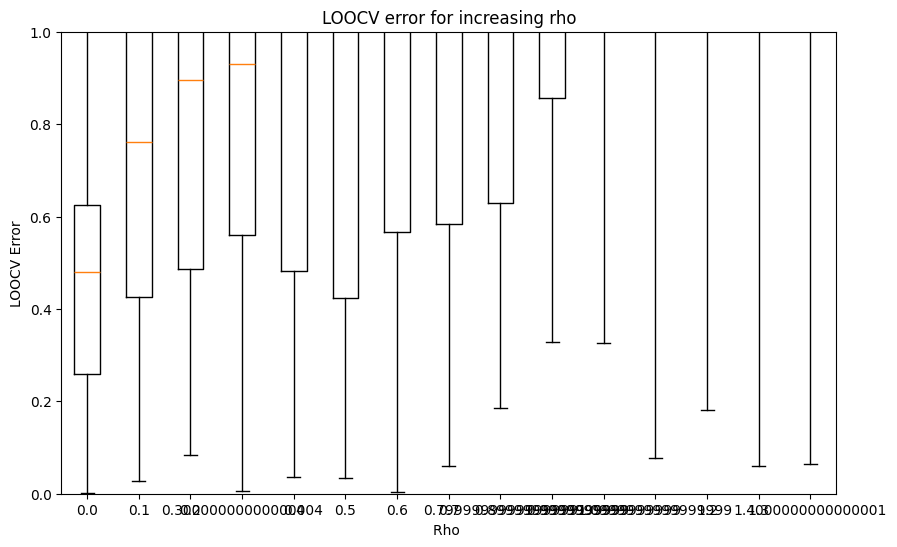

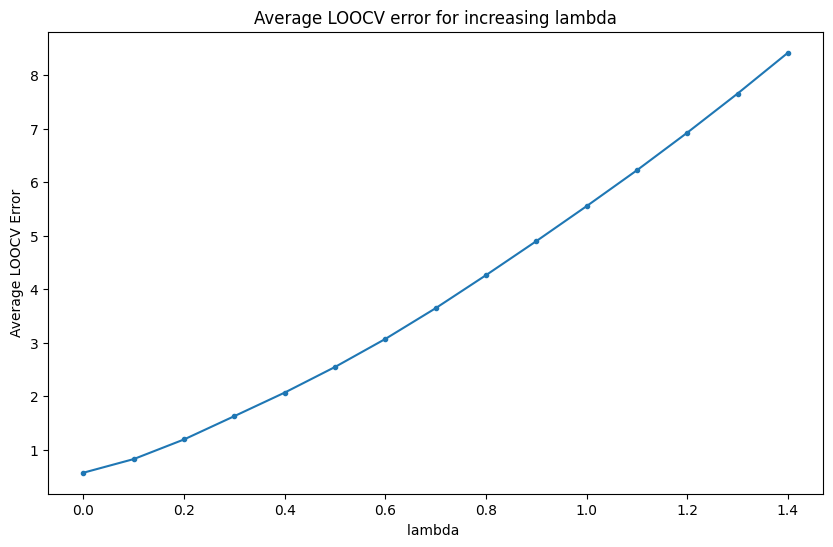

Minimum (average) LOOCV error: 0.5671450037096185 for lambda: 0.0
Minimum (median) LOOCV error: 0.4809627153100937 for lambda: 0.0


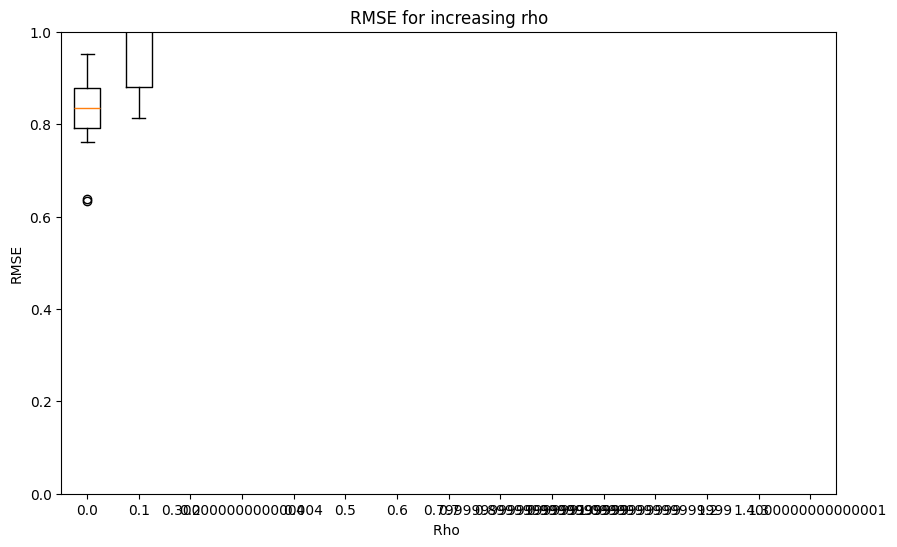

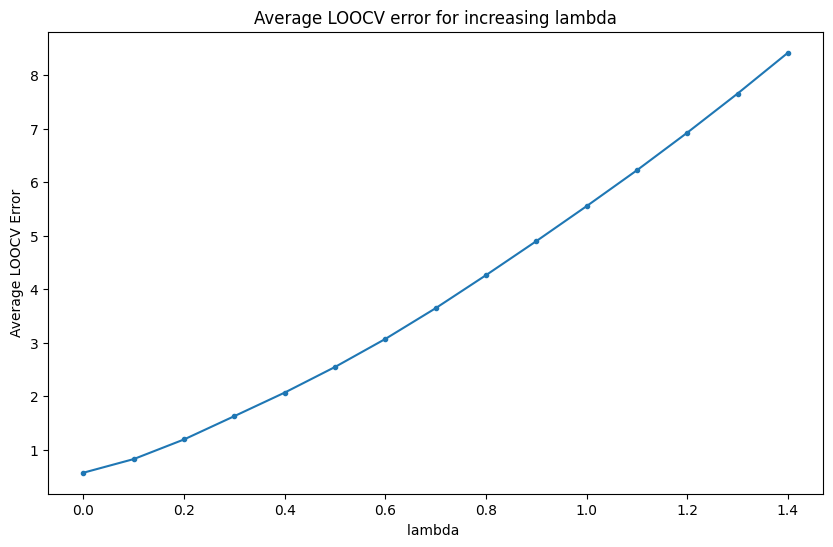

Minimum (average) RMSE: 0.879729847533941 for lambda: 0.0
Minimum (median) RMSE: 0.834112434100055 for lambda: 0.0


In [9]:
path = './SeaSurfTemp/Florida/model_with_lambda/results_LOOCV_lambda_0.18_coarse_increasing_stab.txt'
average_err, median_err, average_rmse, median_rmse = plot_LOOCV_lambda(path, plot=True)

### Visualize results of LOOCV (on tomasetto mesh)

Mean LOOCV error: 0.567143113877288
Median LOOCV error: 0.4813379651205896
Mean RMSE: 0.8788585896828663
Median RMSE: 0.8336274073579277


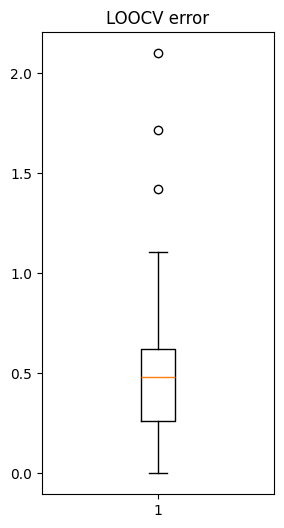

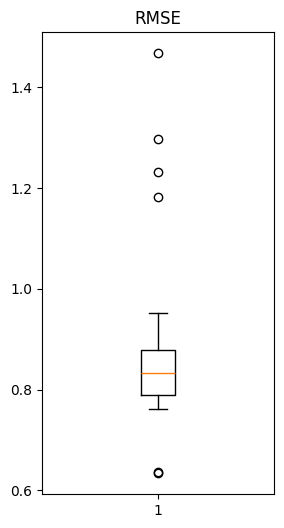

In [23]:
# path = './SeaSurfTemp/Florida/model_with_lambda/results_LOOCV_lambda_0.15_coarse.txt'
# path = './SeaSurfTemp/Florida/model_with_lambda/results_LOOCV_lambda_0.18_coarse.txt'
# path = './SeaSurfTemp/Florida/model_with_convex_combination_rho/results_LOOCV_optimal_rho.txt'
data_LOOCV = np.genfromtxt(path, delimiter='\t')
locErr = data_LOOCV[:, 4]

mean_err = np.mean(locErr)
median_err = np.median(locErr)
print(f"Mean LOOCV error: {mean_err}")
print(f"Median LOOCV error: {median_err}")

rmse = data_LOOCV[:, 3]
mean_rmse = np.mean(rmse)
median_rmse = np.median(rmse)
print(f"Mean RMSE: {mean_rmse}")
print(f"Median RMSE: {median_rmse}")

# boxplot of locErr
plt.figure(figsize=(3, 6))
plt.boxplot(locErr)
plt.title('LOOCV error')
plt.savefig('boxplot_locErr_mesh_coarse_LOOCV_rho_opt.png')
plt.show()

# boxplot of rmse (without outliers)
plt.figure(figsize=(3, 6))
plt.boxplot(rmse)
plt.title('RMSE')
plt.savefig('boxplot_rmse_mesh_coarse_LOOCV_rho_opt.png')
plt.show()